<a href="https://colab.research.google.com/github/SuhasiSethi15/CNC_Model/blob/main/FN_CNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas xgboost scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('/content/dataset.csv.csv')  # Adjust the file name as needed
print("Dataset loaded successfully.")
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns.tolist())


Dataset loaded successfully.
Shape of the dataset: (10000, 14)
Columns in the dataset: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [ ]:
# Define features and target variable
X = df.drop(['Machine failure', 'UDI', 'Product ID'], axis=1)  # Exclude target and non-feature columns
y = df['Machine failure']  # Target variable

print("Features (X):")
print(X.head())
print("Target variable (y):")
print(y.head())


Features (X):
  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  
0         42.8                0    0    0    0    0    0  
1         46.3                3    0    0    0    0    0  
2         49.4                5    0    0    0    0    0  
3         39.5                7    0    0    0    0    0  
4         40.0                9    0    0    0    0    0  
Target variable (y):
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64


In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Product ID', 'Type'], drop_first=True)

# Split into features and target
X = df.drop('Machine failure', axis=1)  # Features
y = df['Machine failure']                 # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (8000, 10012), Testing data shape: (2000, 10012)


In [ ]:
# One-hot encode the 'Type' column if necessary
X = pd.get_dummies(X, columns=['Type'], drop_first=True)  # Drop first to avoid dummy variable trap
print("After one-hot encoding:")
print(X.head())


After one-hot encoding:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Type_L  Type_M  
0         42.8                0    0    0    0    0    0   False    True  
1         46.3                3    0    0    0    0    0    True   False  
2         49.4                5    0    0    0    0    0    True   False  
3         39.5                7    0    0    0    0    0    True   False  
4         40.0                9    0    0    0    0    0    True   False  


In [ ]:
# Remove or replace invalid characters in column names
X.columns = X.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_')
print("Cleaned column names:")
print(X.columns.tolist())


Cleaned column names:
['UDI', 'Air temperature _K_', 'Process temperature _K_', 'Rotational speed _rpm_', 'Torque _Nm_', 'Tool wear _min_', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Product ID_H29425', 'Product ID_H29432', 'Product ID_H29434', 'Product ID_H29441', 'Product ID_H29452', 'Product ID_H29457', 'Product ID_H29462', 'Product ID_H29466', 'Product ID_H29481', 'Product ID_H29494', 'Product ID_H29500', 'Product ID_H29522', 'Product ID_H29525', 'Product ID_H29550', 'Product ID_H29552', 'Product ID_H29557', 'Product ID_H29560', 'Product ID_H29569', 'Product ID_H29571', 'Product ID_H29580', 'Product ID_H29581', 'Product ID_H29595', 'Product ID_H29606', 'Product ID_H29607', 'Product ID_H29610', 'Product ID_H29626', 'Product ID_H29635', 'Product ID_H29680', 'Product ID_H29682', 'Product ID_H29684', 'Product ID_H29691', 'Product ID_H29702', 'Product ID_H29707', 'Product ID_H29712', 'Product ID_H29716', 'Product ID_H29724', 'Product ID_H29734', 'Product ID_H29742', 'Product ID_H29743', 'Produ

In [ ]:
# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
try:
    xgb_model.fit(X_train, y_train)
    print("Model fitted successfully.")
except Exception as e:
    print(f"Error during model fitting: {e}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model fitted successfully.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8000, 10012)
Testing set shape: (2000, 10012)


In [ ]:
# Initialize the model
xgb_model = XGBClassifier()
print("XGBoost model initialized.")


XGBoost model initialized.


In [ ]:
# Fit the model to the training data
xgb_model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [ ]:
# Define the questions based on the features
questions = {
    'Air temperature [K]': 'What is the air temperature in Kelvin?',
    'Process temperature [K]': 'What is the process temperature in Kelvin?',
    'Rotational speed [rpm]': 'What is the rotational speed in rpm?',
    'Torque [Nm]': 'What is the torque in Nm?',
    'Tool wear [min]': 'What is the tool wear in minutes?',
    'TWF': 'Is the TWF condition normal? (1 for Yes, 0 for No)',
    'HDF': 'Is the HDF condition normal? (1 for Yes, 0 for No)',
    'PWF': 'Is the PWF condition normal? (1 for Yes, 0 for No)',
    'OSF': 'Is the OSF condition normal? (1 for Yes, 0 for No)',
    'RNF': 'Is the RNF condition normal? (1 for Yes, 0 for No)',
    'Type_L': 'Is the machine type L? (1 for Yes, 0 for No)',
    'Type_M': 'Is the machine type M? (1 for Yes, 0 for No)',
}
print("Ready to gather user input.")


Ready to gather user input.


In [ ]:
# Create a DataFrame to hold the user input
user_input = {}

# Ask the user for inputs
for feature, question in questions.items():
    user_input[feature] = float(input(question + ' '))
print("User input collected:")
print(user_input)


What is the air temperature in Kelvin? 586
What is the process temperature in Kelvin? 154
What is the rotational speed in rpm? 1555
What is the torque in Nm? 51
What is the tool wear in minutes? 15
Is the TWF condition normal? (1 for Yes, 0 for No) 0
Is the HDF condition normal? (1 for Yes, 0 for No) 1
Is the PWF condition normal? (1 for Yes, 0 for No) 1
Is the OSF condition normal? (1 for Yes, 0 for No) 1
Is the RNF condition normal? (1 for Yes, 0 for No) 1
Is the machine type L? (1 for Yes, 0 for No) 0
Is the machine type M? (1 for Yes, 0 for No) 1
User input collected:
{'Air temperature [K]': 586.0, 'Process temperature [K]': 154.0, 'Rotational speed [rpm]': 1555.0, 'Torque [Nm]': 51.0, 'Tool wear [min]': 15.0, 'TWF': 0.0, 'HDF': 1.0, 'PWF': 1.0, 'OSF': 1.0, 'RNF': 1.0, 'Type_L': 0.0, 'Type_M': 1.0}


In [ ]:
# Convert the user input into a DataFrame
input_df = pd.DataFrame([user_input])

# Ensure the input DataFrame has the same columns as the training DataFrame
missing_cols = set(X_train.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0  # Fill missing columns with 0

# Reorder the input DataFrame columns to match the training set
input_df = input_df[X_train.columns]
print("Input DataFrame prepared:")
print(input_df)


Input DataFrame prepared:
   Air temperature _K_  Process temperature _K_  Rotational speed _rpm_  \
0                    0                        0                       0   

   Torque _Nm_  Tool wear _min_  TWF  HDF  PWF  OSF  RNF  Type_L  Type_M  
0            0                0  0.0  1.0  1.0  1.0  1.0     0.0     1.0  


In [ ]:
# Make the prediction
prediction = xgb_model.predict(input_df)

# Interpret the prediction
if prediction[0] == 1:
    print("Maintenance is needed.")
else:
    print("Maintenance is not needed.")


Maintenance is needed.


In [ ]:
from sklearn.metrics import accuracy_score

# After fitting the model and making predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 99.90%


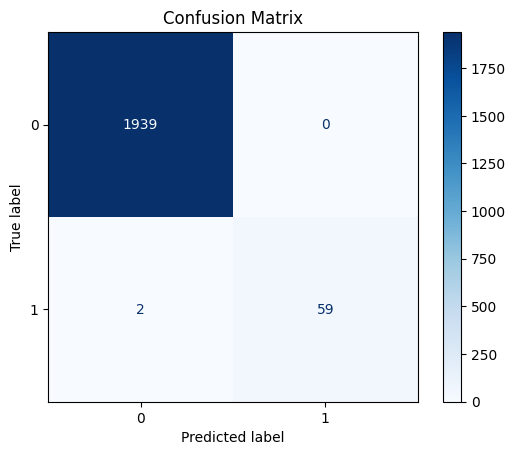

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


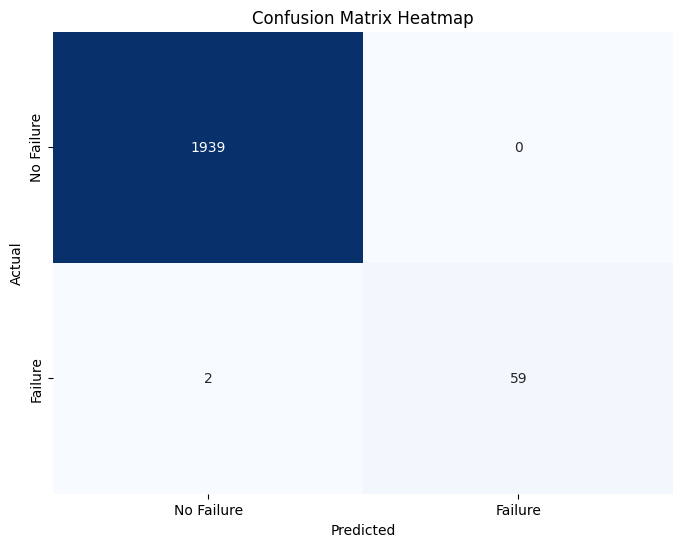

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


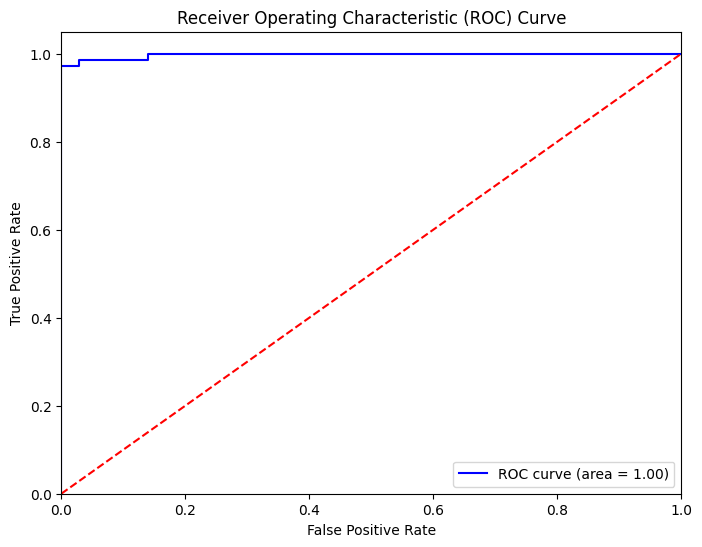

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<Figure size 1000x600 with 0 Axes>

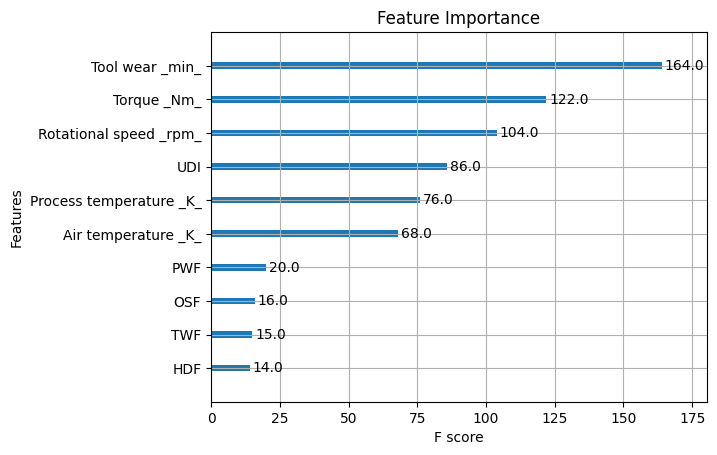

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()


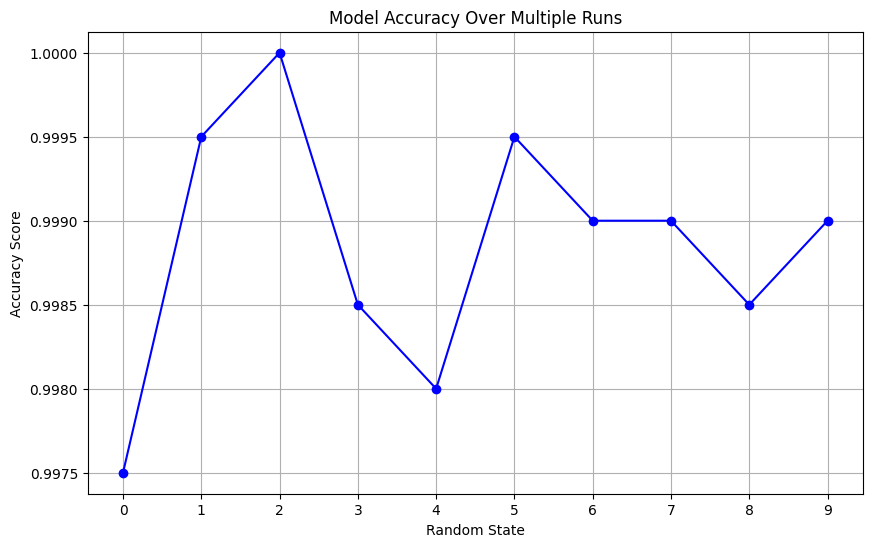

In [ ]:
accuracy_scores = []

# Run the model multiple times to gather accuracy scores
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(10), accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy Over Multiple Runs')
plt.xlabel('Random State')
plt.ylabel('Accuracy Score')
plt.xticks(range(10))
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000

[[1939    0]
 [  61    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Data types before preprocessing:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
Logistic Regression Accuracy: 97.30%
Decision Tree Accuracy: 99.90%
Random Forest Accuracy: 99.90%
XGBoost Accuracy: 99.90%


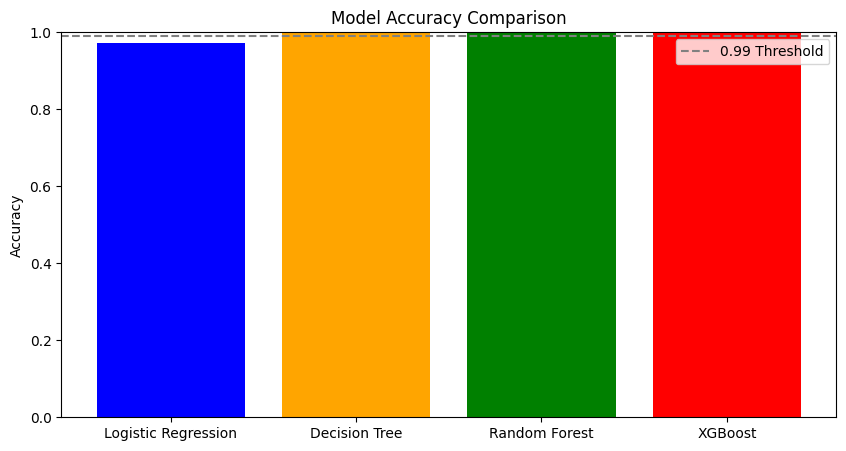

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual dataset path)
df = pd.read_csv('/content/dataset.csv.csv')  # Ensure this is the correct path to your CSV file

# Separate features and target variable
X = df.drop('Machine failure', axis=1)  # Adjust 'Machine failure' to your target column
y = df['Machine failure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data types
print("Data types before preprocessing:\n", X_train.dtypes)

# Convert categorical features to numerical (if necessary)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns of train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Clean column names to remove invalid characters for XGBoost
X_train.columns = X_train.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_')
X_test.columns = X_test.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_')

# Fill missing values (if necessary)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Scale the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Train and evaluate each model
accuracies = {}

for model_name, model in models.items():
    # Use scaled data for all models except XGBoost
    X_data = X_train_scaled if model_name != 'XGBoost' else X_train
    X_test_data = X_test_scaled if model_name != 'XGBoost' else X_test

    model.fit(X_data, y_train)
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')

# Compare the results visually
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.axhline(y=0.99, color='gray', linestyle='--', label='0.99 Threshold')
plt.legend()
plt.show()


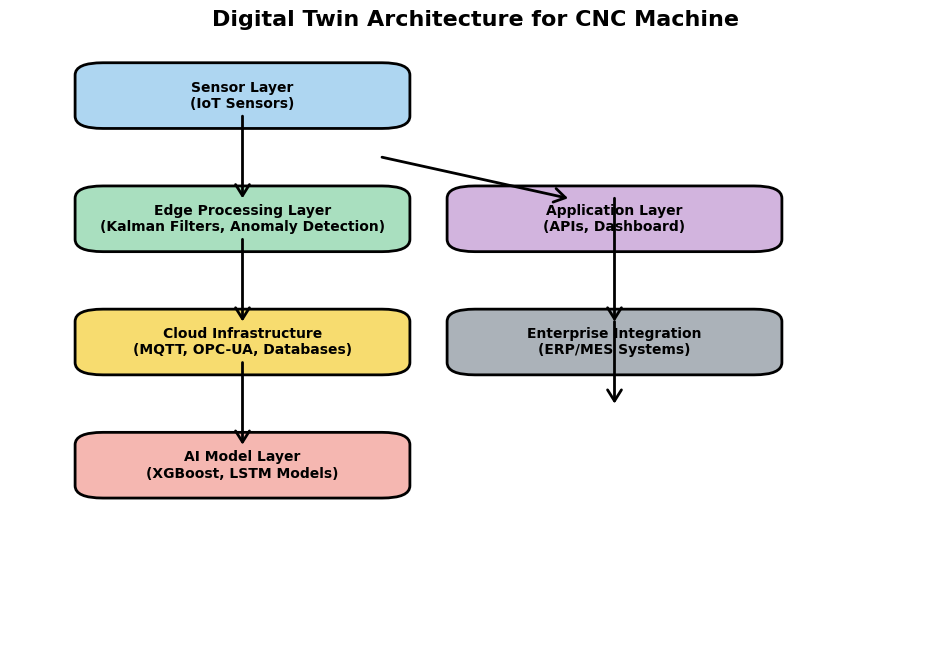

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ArrowStyle, ConnectionPatch

def add_box(ax, text, xy, width, height, color):
    """Adds a labeled box to the plot."""
    box = FancyBboxPatch(xy, width, height, boxstyle="round,pad=0.3",
                         edgecolor='black', facecolor=color, lw=2)
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text,
            ha='center', va='center', fontsize=10, fontweight='bold')

def add_arrow(ax, xy_start, xy_end):
    """Adds an arrow to connect components."""
    arrow = ConnectionPatch(xy_start, xy_end, "data", "data",
                            arrowstyle=ArrowStyle("->", head_length=0.8, head_width=0.5),
                            lw=2, color="black")
    ax.add_patch(arrow)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)
ax.axis('off')

# Adding Boxes (Layers) with Labels
add_box(ax, "Sensor Layer\n(IoT Sensors)", (1, 13), 3, 1, '#AED6F1')
add_box(ax, "Edge Processing Layer\n(Kalman Filters, Anomaly Detection)", (1, 10), 3, 1, '#A9DFBF')
add_box(ax, "Cloud Infrastructure\n(MQTT, OPC-UA, Databases)", (1, 7), 3, 1, '#F7DC6F')
add_box(ax, "AI Model Layer\n(XGBoost, LSTM Models)", (1, 4), 3, 1, '#F5B7B1')
add_box(ax, "Application Layer\n(APIs, Dashboard)", (5, 10), 3, 1, '#D2B4DE')
add_box(ax, "Enterprise Integration\n(ERP/MES Systems)", (5, 7), 3, 1, '#ABB2B9')

# Adding Arrows between Layers
add_arrow(ax, (2.5, 13), (2.5, 11))  # Sensor to Edge Processing
add_arrow(ax, (2.5, 10), (2.5, 8))  # Edge Processing to Cloud
add_arrow(ax, (2.5, 7), (2.5, 5))  # Cloud to AI Models
add_arrow(ax, (6.5, 11), (6.5, 8))  # Application to Cloud
add_arrow(ax, (6.5, 8), (6.5, 6))  # Cloud to Enterprise Integration

# Adding Cross-layer Communication Arrow (WebSockets)
add_arrow(ax, (4, 12), (6, 11))  # Sensor to Application (WebSocket example)

# Adding Final Touches
ax.set_title("Digital Twin Architecture for CNC Machine", fontsize=16, fontweight='bold')
plt.show()


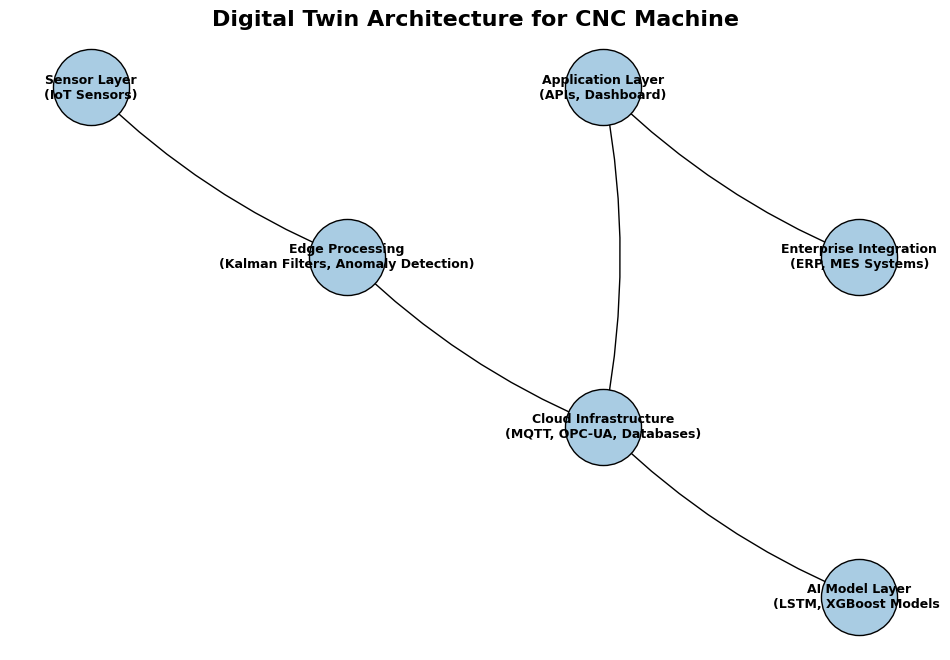

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes (layers of your architecture)
nodes = [
    "Sensor Layer\n(IoT Sensors)",
    "Edge Processing\n(Kalman Filters, Anomaly Detection)",
    "Cloud Infrastructure\n(MQTT, OPC-UA, Databases)",
    "AI Model Layer\n(LSTM, XGBoost Models)",
    "Application Layer\n(APIs, Dashboard)",
    "Enterprise Integration\n(ERP, MES Systems)"
]

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

# Define edges (data flow connections between layers)
edges = [
    ("Sensor Layer\n(IoT Sensors)", "Edge Processing\n(Kalman Filters, Anomaly Detection)"),
    ("Edge Processing\n(Kalman Filters, Anomaly Detection)", "Cloud Infrastructure\n(MQTT, OPC-UA, Databases)"),
    ("Cloud Infrastructure\n(MQTT, OPC-UA, Databases)", "AI Model Layer\n(LSTM, XGBoost Models)"),
    ("Cloud Infrastructure\n(MQTT, OPC-UA, Databases)", "Application Layer\n(APIs, Dashboard)"),
    ("Application Layer\n(APIs, Dashboard)", "Enterprise Integration\n(ERP, MES Systems)"),
]

# Add edges to the graph
for edge in edges:
    G.add_edge(*edge)

# Define positions for the nodes (manual layout for better readability)
pos = {
    "Sensor Layer\n(IoT Sensors)": (0, 5),
    "Edge Processing\n(Kalman Filters, Anomaly Detection)": (2, 4),
    "Cloud Infrastructure\n(MQTT, OPC-UA, Databases)": (4, 3),
    "AI Model Layer\n(LSTM, XGBoost Models)": (6, 2),
    "Application Layer\n(APIs, Dashboard)": (4, 5),
    "Enterprise Integration\n(ERP, MES Systems)": (6, 4)
}

# Draw the nodes and edges
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='#A9CCE3', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', verticalalignment='center')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='black', connectionstyle='arc3,rad=0.1')

# Set plot title and remove axis
plt.title("Digital Twin Architecture for CNC Machine", fontsize=16, fontweight='bold')
plt.axis('off')

# Show the diagram
plt.show()


<ipython-input-3-ac3b2140ff87>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


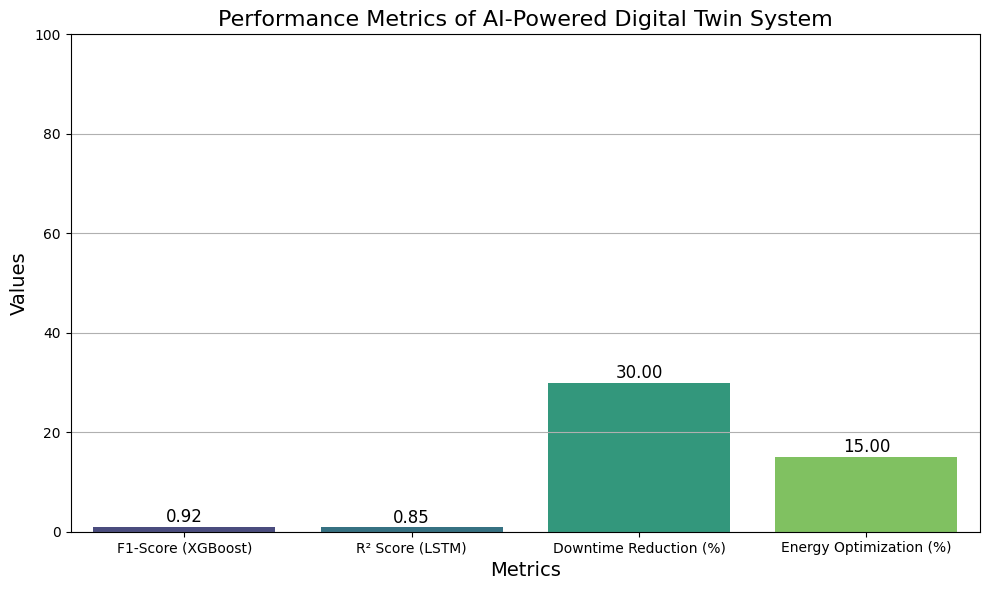

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
metrics = ['F1-Score (XGBoost)', 'R² Score (LSTM)', 'Downtime Reduction (%)', 'Energy Optimization (%)']
values = [0.92, 0.85, 30, 15]  # Corresponding values for each metric

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')

# Add title and labels
plt.title('Performance Metrics of AI-Powered Digital Twin System', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.ylim(0, 100)  # Adjust y-axis limit for better visualization

# Annotate bars with values
for index, value in enumerate(values):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', fontsize=12)

# Show gridlines for clarity
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


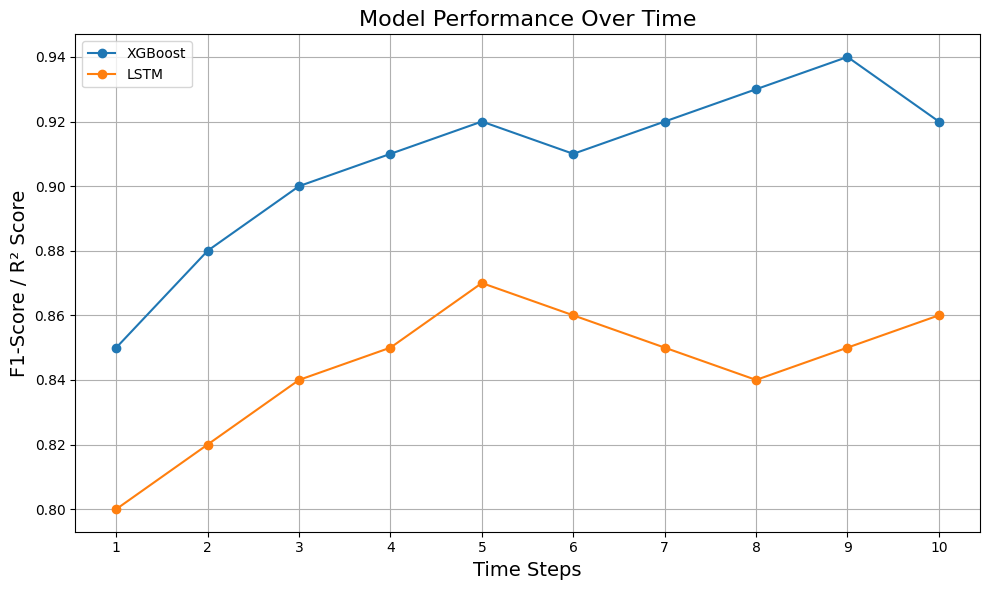

In [ ]:
# Sample time-series data for machine performance
time_steps = np.arange(1, 11)  # Time steps (e.g., hours or days)
performance_data = {
    'XGBoost': [0.85, 0.88, 0.90, 0.91, 0.92, 0.91, 0.92, 0.93, 0.94, 0.92],
    'LSTM': [0.80, 0.82, 0.84, 0.85, 0.87, 0.86, 0.85, 0.84, 0.85, 0.86]
}

plt.figure(figsize=(10, 6))
for model, scores in performance_data.items():
    plt.plot(time_steps, scores, marker='o', label=model)

# Add title and labels
plt.title('Model Performance Over Time', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('F1-Score / R² Score', fontsize=14)
plt.xticks(time_steps)  # Set x-ticks to match time steps
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-7-0861da6a3252>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Blues')


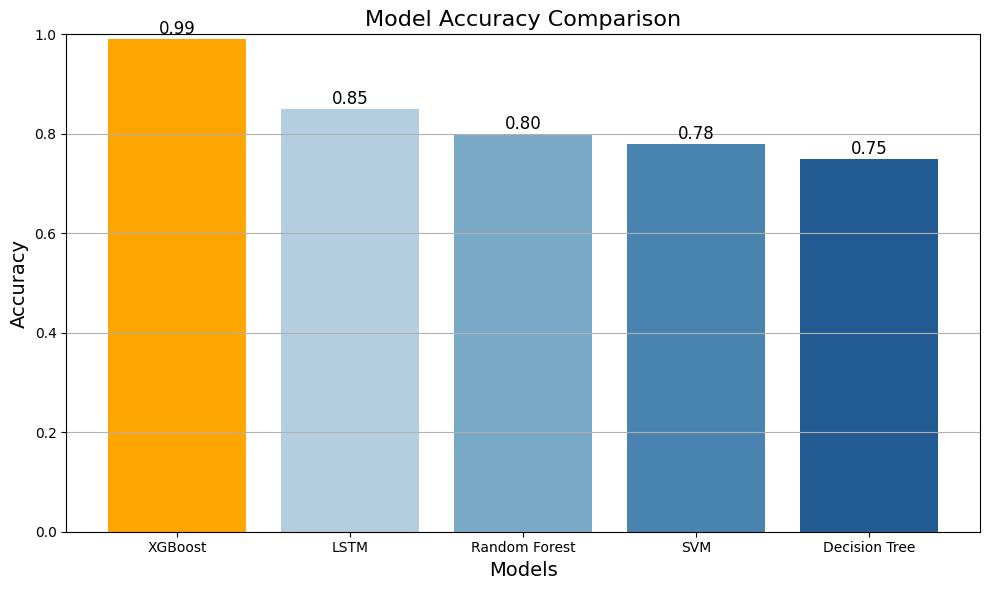

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = ['XGBoost', 'LSTM', 'Random Forest', 'SVM', 'Decision Tree']
accuracies = [0.99, 0.85, 0.80, 0.78, 0.75]  # Accuracy values

# Set up the figure
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='Blues')

# Title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set the limit of y-axis for accuracy (0 to 1)

# Annotate bars with accuracy values
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=12)

# Highlight the maximum accuracy
plt.bar(0, accuracies[0], color='orange')  # Highlighting XGBoost
#plt.text(0, accuracies[0] + 0.01, 'Maximum Accuracy', ha='center', fontsize=12, color='black')

# Gridlines for clarity
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()
